In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os

from scipy.io import loadmat

import pandas as pd

# Importing drive method from colab for accessing google drive
# from google.colab import drive
# import glob

# drive.mount('/content/drive')

In [2]:
def parse_ELAS3D_results(filepath: str) -> dict:
    with open(filepath, "r") as f:
        s = f.read()
    lines = s.strip().split("\n")
    n_prop = 0
    for i, l in enumerate(lines):
        if l == "PROPERTIES":
            n_prop = i
            break

    lines = lines[n_prop + 1 :]

    d = dict()
    for l in lines:
        temp = l.strip().split()
        d[" ".join(temp[:-1])] = float(temp[-1])

    return d

def create_df(path_to_txt):
    
    files_txt = os.listdir(path_to_txt)
    files_txt = [f for f in files_txt if os.path.splitext(f)[1] == ".txt"]
    
    files_dict = {}
    for f in files_txt:
        prop_dict = parse_ELAS3D_results(path_to_txt+f)
        experiment_name = os.path.splitext(f)[0]
        files_dict.update({experiment_name: prop_dict})
    return pd.DataFrame.from_dict(files_dict, orient='index')

In [3]:
properties_df = create_df('./data/')

In [4]:
properties_df

,Bulk modulus,Shear modulus,Density,Porosity,Compressional velocity,Shear velocity,Young modulus,Poisson ratio
pm_better_siren,16.450583,14.368790,2.082861,0.343720,4.134752,2.626515,33.386013,0.161754
Normal_1_0.5,13.438394,10.549323,2.086151,0.341727,3.631001,2.248741,25.084164,0.188899
pmatched_fou_batch_222_epoch1500_lr0_1em2Normal_1_0.5,15.635181,12.991699,2.085626,0.342045,3.975196,2.495829,30.521406,0.174650


In [5]:
properties_df.to_csv('elastic_properties_table.csv')

## Plotting the results

In [6]:
def plot_subplot(ax, path, name, data_slices, postprocessor=None):
    data3d_predicted = np.load(path+name).transpose(1,0,2)
    #params = parse_filename_fourier(name)
    a = data3d_predicted[:,:,given_slice]
    if postprocessor is not None:
        a = postprocessor(a)
    ax[0].imshow(a.T, cmap='gray')
    ax[0].set_title('generated, train')
    ax[0].axis('off')
    
    
    ax[1].imshow(data_slices[:,:,0], cmap='gray')
    ax[1].set_title('ground-truth, train')
    #xlabel=', '.join(key + ': ' + str(params[key]) for key in params.keys())
    #ax[1].set_xlabel(xlabel, fontsize=16, color='green')
    ax[1].axis('off')

    b = data3d_predicted[:,:,new_slice]
    if postprocessor is not None:
        b = postprocessor(b)
        
    ax[2].imshow(b.T, cmap='gray')
    ax[2].set_title('generated, test')
    ax[2].axis('off')

    ax[3].imshow(data_slices[:,:,1], cmap='gray')
    ax[3].set_title('ground-truth, test')
    ax[3].axis('off')

In [7]:
post = lambda x: x.round()

In [8]:
def plot_for_several_files(files, data_slices):
    N_files = len(files)

    fig = plt.figure(figsize=(20, N_files*5))
    axes = fig.subplots(N_files, 4)

    for i, name in enumerate(files):
        data3d_predicted = np.load(save_npy_path + name)
        plot_subplot(axes[i], save_npy_path, name, data_slices, postprocessor=None)

    plt.tight_layout()

In [9]:
import os

thresh =127

# original data
filename = "Normal_1_0.5.npy"
data_path = "./data/"
data3d = (np.load(data_path + filename)).astype(np.float)

given_slice = 0
new_slice = 30
data_slices = data3d[:,:,[given_slice, new_slice]]

# generated data
save_npy_path = './data/'
files = os.listdir(save_npy_path)
files = [f for f in files if os.path.splitext(f)[1] == ".npy"]


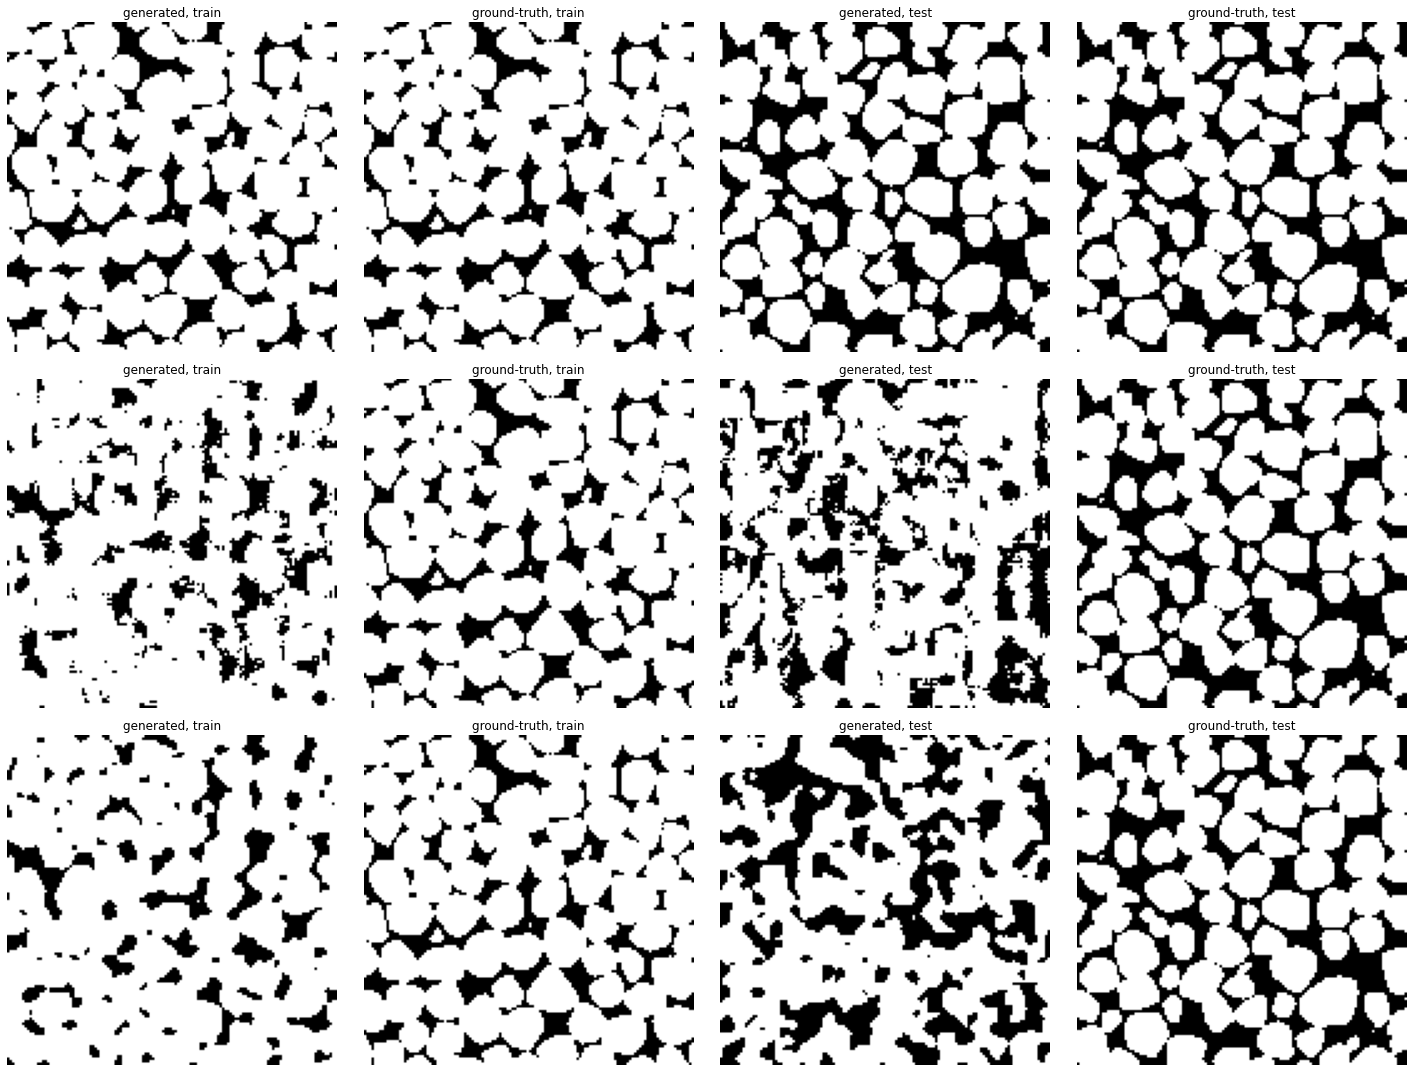

In [10]:
plot_for_several_files(files[:3], data_slices)